# Data Preprocessing Pipeline Visualization

This notebook runs the complete preprocessing pipeline and visualizes the results.

In [11]:
# Import the main function
from main_polars import main_1
import polars as pl

## Run the Preprocessing Pipeline

Execute the main function to process all assets and create the panel data.

In [12]:
# Run the main function with default parameters
# start_date='2008-09-01', end_date='2008-12-31', chosen_interval='1min'
panel = main_1()

# Display panel info
print(f"Panel shape: {panel.shape}")
print(f"\nPanel columns: {panel.columns}")
print(f"\nFirst few rows:")
panel.head()

Initializing data preprocessor...

Step 1: Processing/Loading cleaned assets...
PROCESSING 85 ASSETS
Date filter: 2008-09-01 to 2008-12-31
Files already cleaned: 85
Files to process: 0

Timestamp file already exists, loading it...


Assets to skip due to incomplete data coverage: 7
Assets: ['AA.N', 'DVN.N', 'MA.N', 'MS.N', 'NOV.N', 'PM.N', 'V.N']


Missing data report already exists, skipping analysis...


[1/85] Loading MDT.N... (already cleaned)
  Loaded: 3,322,742 rows

[2/85] Loading KFT.N... (already cleaned)
  Loaded: 3,858,623 rows

[3/85] Loading CL.N... (already cleaned)
  Loaded: 3,114,122 rows

[4/85] Loading EMR.N... (already cleaned)
  Loaded: 3,256,258 rows

[5/85] Loading VZ.N... (already cleaned)
  Loaded: 4,534,184 rows

[6/85] Loading CVX.N... (already cleaned)
  Loaded: 6,128,782 rows

[7/85] Loading IBM.N... (already cleaned)
  Loaded: 4,427,542 rows

[8/85] Loading TWX.N... (already cleaned)
  Loaded: 4,280,817 rows

[9/85] Loading DOW.N... (already cleaned)
  Load

timestamp,ticker,ask-price,ask-volume,bid-price,bid-volume,spread,mid-price,volume_imbalance,industry
datetime[μs],str,f64,f64,f64,f64,f64,f64,f64,str
2008-09-02 13:30:00,"""ABT""",58.537504,605.0,58.309401,484.0,0.228103,58.423452,-0.111111,"""healthcare"""
2008-09-02 13:30:00,"""ALL""",45.75773,163.0,45.637612,67.0,0.120118,45.697671,-0.417391,"""financials"""
2008-09-02 13:30:00,"""BAC""",33.0075,13393.0,32.955497,8656.0,0.052003,32.981498,-0.21484,"""financials"""
2008-09-02 13:30:00,"""BAX""",68.484787,328.0,68.272418,153.0,0.212368,68.378602,-0.363825,"""healthcare"""
2008-09-02 13:30:00,"""BK""",35.3655,280.0,35.302484,153.0,0.063016,35.333992,-0.293303,"""financials"""


# Financial Big Data Analysis

This section explores key characteristics of high-frequency trading data, including market microstructure, cross-sectional heterogeneity, and temporal patterns.

## 1. Data Overview & Summary Statistics

In [13]:
# Summary statistics
print("="*70)
print("PANEL DATA SUMMARY")
print("="*70)

# Overall statistics
total_obs = panel.height
n_assets = panel.select(pl.col('ticker').n_unique()).item()
n_industries = panel.select(pl.col('industry').n_unique()).item()
date_range = panel.select([
    pl.col('timestamp').min().alias('start'),
    pl.col('timestamp').max().alias('end')
])

print(f"Total observations: {total_obs:,}")
print(f"Number of assets: {n_assets}")
print(f"Number of industries: {n_industries}")
print(f"Date range: {date_range['start'][0]} to {date_range['end'][0]}")
print(f"Observations per asset (avg): {total_obs/n_assets:,.0f}")

# Descriptive statistics for key variables
print("\n" + "="*70)
print("DESCRIPTIVE STATISTICS")
print("="*70)

desc_stats = panel.select([
    pl.col('mid-price').mean().alias('mid_price_mean'),
    pl.col('mid-price').std().alias('mid_price_std'),
    pl.col('spread').mean().alias('spread_mean'),
    pl.col('spread').std().alias('spread_std'),
    pl.col('volume_imbalance').mean().alias('vol_imb_mean'),
    pl.col('volume_imbalance').std().alias('vol_imb_std'),
])

print(desc_stats)

PANEL DATA SUMMARY
Total observations: 2,536,312
Number of assets: 78
Number of industries: 10
Date range: 2008-09-02 13:30:00 to 2008-12-30 21:55:00
Observations per asset (avg): 32,517

DESCRIPTIVE STATISTICS
shape: (1, 6)
┌────────────────┬───────────────┬─────────────┬────────────┬──────────────┬─────────────┐
│ mid_price_mean ┆ mid_price_std ┆ spread_mean ┆ spread_std ┆ vol_imb_mean ┆ vol_imb_std │
│ ---            ┆ ---           ┆ ---         ┆ ---        ┆ ---          ┆ ---         │
│ f64            ┆ f64           ┆ f64         ┆ f64        ┆ f64          ┆ f64         │
╞════════════════╪═══════════════╪═════════════╪════════════╪══════════════╪═════════════╡
│ 42.55357       ┆ 23.454518     ┆ 0.061132    ┆ 0.05046    ┆ 0.004445     ┆ 0.318005    │
└────────────────┴───────────────┴─────────────┴────────────┴──────────────┴─────────────┘


## 2. Cross-Sectional Price Heterogeneity

Analyze how prices vary across different assets - a key characteristic of cross-sectional data.

In [14]:
# Price statistics by asset
price_by_asset = panel.group_by('ticker').agg([
    pl.col('mid-price').mean().alias('avg_price'),
    pl.col('mid-price').std().alias('std_price'),
    pl.col('mid-price').min().alias('min_price'),
    pl.col('mid-price').max().alias('max_price'),
]).sort('avg_price', descending=True)

print("Top 10 highest priced assets:")
print(price_by_asset.head(10))

print("\nTop 10 lowest priced assets:")
print(price_by_asset.tail(10))

# Calculate coefficient of variation (CV) for each asset
price_cv = price_by_asset.with_columns([
    (pl.col('std_price') / pl.col('avg_price')).alias('cv')
]).sort('cv', descending=True)

print("\nAssets with highest price volatility (CV):")
print(price_cv.head(10))

Top 10 highest priced assets:
shape: (10, 5)
┌────────┬────────────┬───────────┬───────────┬────────────┐
│ ticker ┆ avg_price  ┆ std_price ┆ min_price ┆ max_price  │
│ ---    ┆ ---        ┆ ---       ┆ ---       ┆ ---        │
│ str    ┆ f64        ┆ f64       ┆ f64       ┆ f64        │
╞════════╪════════════╪═══════════╪═══════════╪════════════╡
│ GS     ┆ 100.206632 ┆ 31.761999 ┆ 47.757657 ┆ 172.172825 │
│ IBM    ┆ 93.570932  ┆ 15.092675 ┆ 69.627305 ┆ 123.940179 │
│ LMT    ┆ 89.593769  ┆ 15.889477 ┆ 67.527254 ┆ 119.687319 │
│ MON    ┆ 85.811136  ┆ 14.586181 ┆ 63.579065 ┆ 121.100819 │
│ ETR    ┆ 83.670341  ┆ 7.043111  ┆ 62.092495 ┆ 103.906133 │
│ APA    ┆ 83.355645  ┆ 16.436006 ┆ 57.215107 ┆ 123.583554 │
│ XOM    ┆ 75.319471  ┆ 4.288213  ┆ 56.79528  ┆ 83.535962  │
│ CVX    ┆ 74.84397   ┆ 6.987968  ┆ 55.83731  ┆ 89.660396  │
│ FDX    ┆ 70.43446   ┆ 10.307976 ┆ 53.955597 ┆ 95.709629  │
│ CL     ┆ 66.984906  ┆ 6.964691  ┆ 54.581499 ┆ 80.429305  │
└────────┴────────────┴───────────┴─────

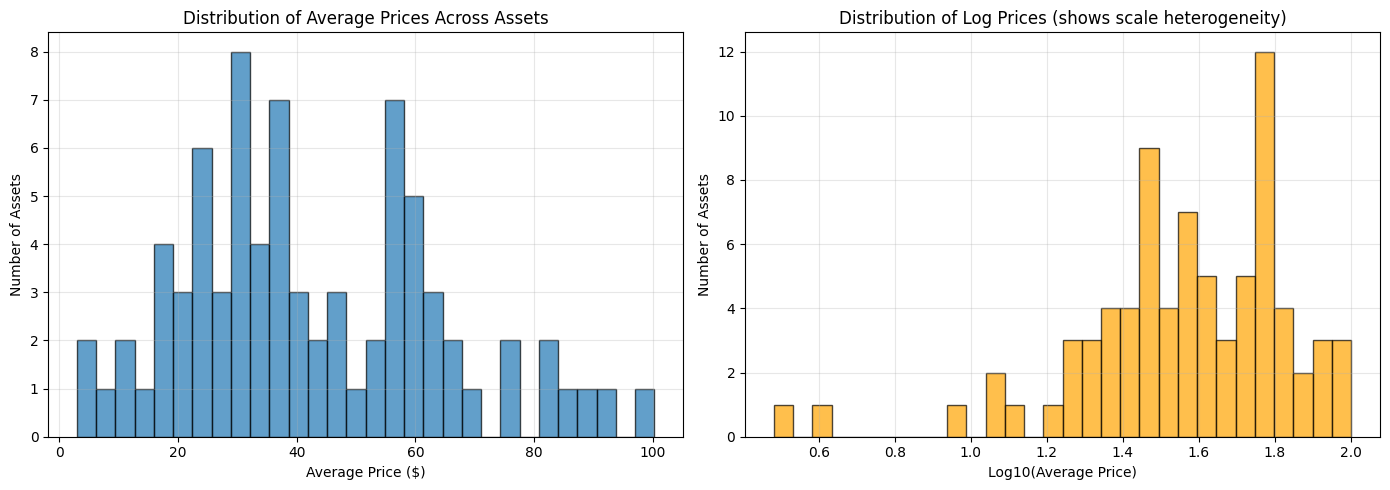


Price range: $3.03 to $100.21
Price range spans 33.1x


In [15]:
# Visualize price distribution across assets
import matplotlib.pyplot as plt
import numpy as np

# Get average price per asset
avg_prices = price_by_asset['avg_price'].to_numpy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of average prices
axes[0].hist(avg_prices, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Average Price ($)')
axes[0].set_ylabel('Number of Assets')
axes[0].set_title('Distribution of Average Prices Across Assets')
axes[0].grid(True, alpha=0.3)

# Log-scale histogram (better for wide range)
axes[1].hist(np.log10(avg_prices), bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Log10(Average Price)')
axes[1].set_ylabel('Number of Assets')
axes[1].set_title('Distribution of Log Prices (shows scale heterogeneity)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPrice range: ${avg_prices.min():.2f} to ${avg_prices.max():.2f}")
print(f"Price range spans {avg_prices.max()/avg_prices.min():.1f}x")

## 3. Market Microstructure: Bid-Ask Spreads

The bid-ask spread is a key measure of market liquidity and transaction costs in high-frequency data.

In [16]:
# Calculate relative spread (spread / mid-price) for better comparison
panel_with_rel_spread = panel.with_columns([
    (pl.col('spread') / pl.col('mid-price') * 10000).alias('rel_spread_bps')
])

# Spread statistics by asset
spread_stats = panel_with_rel_spread.group_by('ticker').agg([
    pl.col('spread').mean().alias('avg_spread'),
    pl.col('rel_spread_bps').mean().alias('avg_rel_spread_bps'),
    pl.col('spread').quantile(0.5).alias('median_spread'),
    pl.col('rel_spread_bps').quantile(0.5).alias('median_rel_spread_bps'),
]).sort('avg_rel_spread_bps')

print("Most liquid assets (tightest spreads):")
print(spread_stats.head(10))

print("\nLeast liquid assets (widest spreads):")
print(spread_stats.tail(10))

Most liquid assets (tightest spreads):
shape: (10, 5)
┌────────┬────────────┬────────────────────┬───────────────┬───────────────────────┐
│ ticker ┆ avg_spread ┆ avg_rel_spread_bps ┆ median_spread ┆ median_rel_spread_bps │
│ ---    ┆ ---        ┆ ---                ┆ ---           ┆ ---                   │
│ str    ┆ f64        ┆ f64                ┆ f64           ┆ f64                   │
╞════════╪════════════╪════════════════════╪═══════════════╪═══════════════════════╡
│ JNJ    ┆ 0.042318   ┆ 6.858473           ┆ 0.038806      ┆ 6.303717              │
│ PG     ┆ 0.050971   ┆ 7.986271           ┆ 0.045674      ┆ 7.046807              │
│ KO     ┆ 0.037499   ┆ 8.057425           ┆ 0.034597      ┆ 7.396294              │
│ WMT    ┆ 0.047201   ┆ 8.506895           ┆ 0.044244      ┆ 7.929309              │
│ PEP    ┆ 0.051551   ┆ 8.846686           ┆ 0.04663       ┆ 7.980877              │
│ XOM    ┆ 0.065742   ┆ 8.857341           ┆ 0.061959      ┆ 8.129248              │
│ MCD    ┆ 

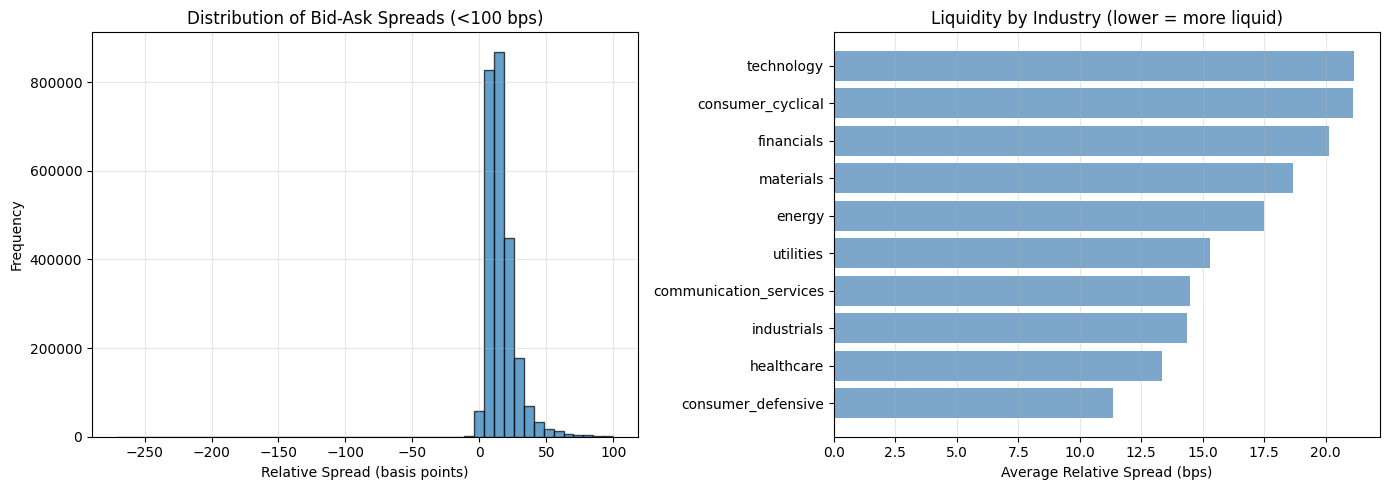

In [17]:
# Visualize spread distribution
rel_spreads = panel_with_rel_spread['rel_spread_bps'].to_numpy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of relative spreads
axes[0].hist(rel_spreads[rel_spreads < 100], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Relative Spread (basis points)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Bid-Ask Spreads (<100 bps)')
axes[0].grid(True, alpha=0.3)

# Box plot by industry
spread_by_industry = panel_with_rel_spread.group_by(['industry', 'ticker']).agg([
    pl.col('rel_spread_bps').mean().alias('avg_spread')
]).group_by('industry').agg([
    pl.col('avg_spread').mean().alias('industry_avg_spread')
]).sort('industry_avg_spread')

industries = spread_by_industry['industry'].to_list()
spreads = spread_by_industry['industry_avg_spread'].to_list()

axes[1].barh(industries, spreads, color='steelblue', alpha=0.7)
axes[1].set_xlabel('Average Relative Spread (bps)')
axes[1].set_title('Liquidity by Industry (lower = more liquid)')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## 4. Intraday Patterns (High-Frequency Feature)

Analyze trading patterns throughout the day - a distinctive feature of high-frequency data.

In [18]:
# Extract hour from timestamp and analyze intraday patterns
intraday_panel = panel_with_rel_spread.with_columns([
    pl.col('timestamp').dt.hour().alias('hour'),
    pl.col('timestamp').dt.minute().alias('minute'),
])

# Calculate average spread and volume by hour
hourly_patterns = intraday_panel.group_by('hour').agg([
    pl.col('spread').mean().alias('avg_spread'),
    pl.col('rel_spread_bps').mean().alias('avg_rel_spread'),
    pl.col('ask-volume').mean().alias('avg_ask_volume'),
    pl.col('bid-volume').mean().alias('avg_bid_volume'),
    pl.count().alias('observations')
]).sort('hour')

print("Intraday patterns by hour:")
print(hourly_patterns)

/var/folders/8t/x2dv0hdn3c76n87nhsht4m1m0000gn/T/ipykernel_96377/1310606806.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias('observations')


ColumnNotFoundError: unable to find column "rel_spread_bps"; valid columns: ["timestamp", "ticker", "ask-price", "ask-volume", "bid-price", "bid-volume", "spread", "mid-price", "volume_imbalance", "industry", "hour", "minute"]

Resolved plan until failure:

	---> FAILED HERE RESOLVING 'sink' <---
DF ["timestamp", "ticker", "ask-price", "ask-volume", ...]; PROJECT */12 COLUMNS

NameError: name 'hourly_patterns' is not defined

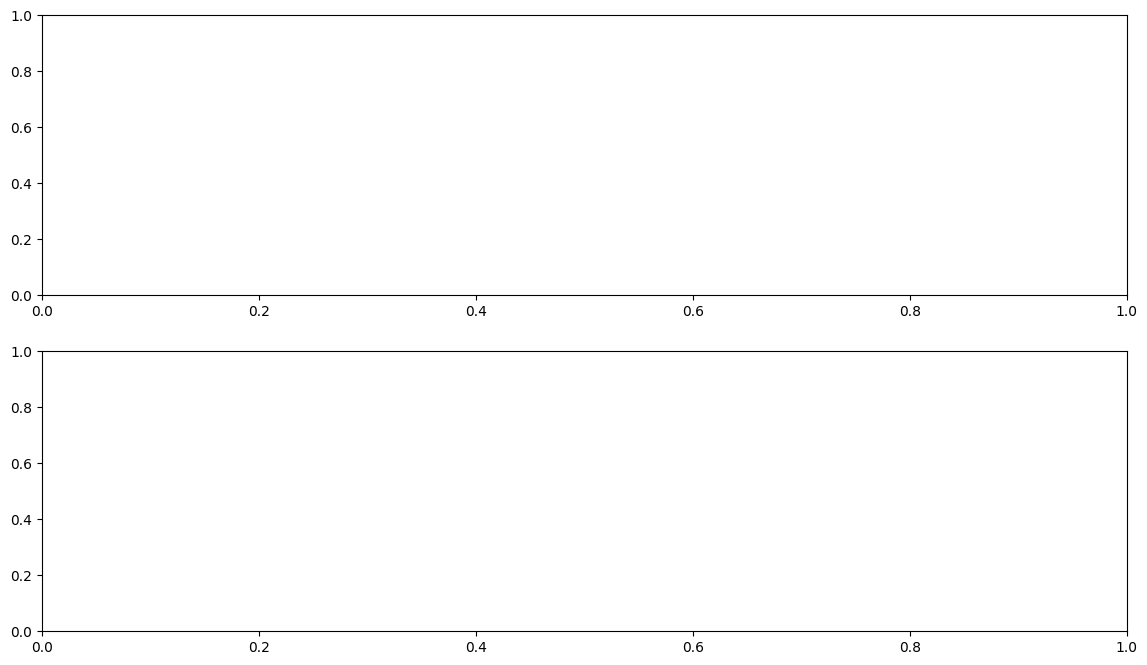

In [ ]:
# Visualize intraday patterns
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

hours = hourly_patterns['hour'].to_numpy()
avg_spreads = hourly_patterns['avg_rel_spread'].to_numpy()
total_volume = (hourly_patterns['avg_ask_volume'] + hourly_patterns['avg_bid_volume']).to_numpy()

# Spread pattern
axes[0].plot(hours, avg_spreads, marker='o', linewidth=2, color='steelblue')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Relative Spread (bps)')
axes[0].set_title('Intraday Spread Pattern (U-shape indicates higher spreads at open/close)')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(hours)

# Volume pattern
axes[1].bar(hours, total_volume, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Average Total Volume')
axes[1].set_title('Intraday Volume Pattern (shows trading activity)')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_xticks(hours)

plt.tight_layout()
plt.show()

print("\nKey observations:")
print(f"- Highest spread at hour: {hours[np.argmax(avg_spreads)]}")
print(f"- Lowest spread at hour: {hours[np.argmin(avg_spreads)]}")
print(f"- Highest volume at hour: {hours[np.argmax(total_volume)]}")

## 5. Volume Imbalance Analysis

Volume imbalance measures order flow pressure and can predict short-term price movements.

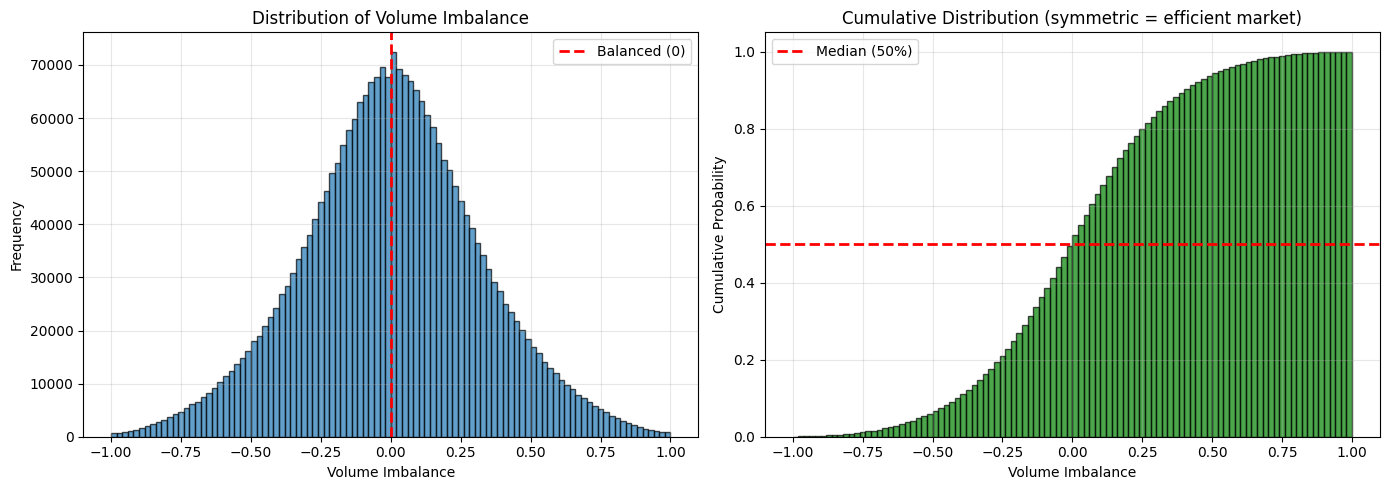

Mean volume imbalance: 0.0044 (close to 0 = balanced)
Std volume imbalance: 0.3180
% observations with bid pressure (>0): 50.4%
% observations with ask pressure (<0): 49.4%


In [ ]:
# Analyze volume imbalance distribution
vol_imb = panel['volume_imbalance'].to_numpy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of volume imbalance
axes[0].hist(vol_imb, bins=100, edgecolor='black', alpha=0.7, range=(-1, 1))
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Balanced (0)')
axes[0].set_xlabel('Volume Imbalance')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Volume Imbalance')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Check if centered around 0 (market efficiency)
axes[1].hist(vol_imb, bins=100, edgecolor='black', alpha=0.7, cumulative=True, 
             density=True, range=(-1, 1), color='green')
axes[1].axhline(0.5, color='red', linestyle='--', linewidth=2, label='Median (50%)')
axes[1].set_xlabel('Volume Imbalance')
axes[1].set_ylabel('Cumulative Probability')
axes[1].set_title('Cumulative Distribution (symmetric = efficient market)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean volume imbalance: {vol_imb.mean():.4f} (close to 0 = balanced)")
print(f"Std volume imbalance: {vol_imb.std():.4f}")
print(f"% observations with bid pressure (>0): {(vol_imb > 0).mean()*100:.1f}%")
print(f"% observations with ask pressure (<0): {(vol_imb < 0).mean()*100:.1f}%")

## 6. Returns Analysis (High-Frequency Returns)

Calculate and analyze minute-by-minute returns - demonstrates high-frequency data characteristics.

In [ ]:
# Calculate log returns for each asset
panel_returns = panel.sort(['ticker', 'timestamp']).with_columns([
    (pl.col('mid-price').log().diff().over('ticker') * 10000).alias('log_return_bps')
])

# Remove NaN from first observation per ticker
panel_returns = panel_returns.filter(pl.col('log_return_bps').is_not_null())

# Get returns statistics
returns_stats = panel_returns.select([
    pl.col('log_return_bps').mean().alias('mean_return'),
    pl.col('log_return_bps').std().alias('volatility'),
    pl.col('log_return_bps').skew().alias('skewness'),
    pl.col('log_return_bps').kurtosis().alias('kurtosis'),
])

print("High-Frequency Returns Statistics (in basis points):")
print(returns_stats)
print("\nInterpretation:")
print("- Mean close to 0: no systematic drift at 1-min frequency")
print("- High kurtosis (>3): fat tails, typical of HF data")
print("- Skewness: asymmetry in return distribution")

High-Frequency Returns Statistics (in basis points):
shape: (1, 4)
┌─────────────┬────────────┬──────────┬─────────────┐
│ mean_return ┆ volatility ┆ skewness ┆ kurtosis    │
│ ---         ┆ ---        ┆ ---      ┆ ---         │
│ f64         ┆ f64        ┆ f64      ┆ f64         │
╞═════════════╪════════════╪══════════╪═════════════╡
│ -0.122863   ┆ 25.295052  ┆ 3.555248 ┆ 1308.498747 │
└─────────────┴────────────┴──────────┴─────────────┘

Interpretation:
- Mean close to 0: no systematic drift at 1-min frequency
- High kurtosis (>3): fat tails, typical of HF data
- Skewness: asymmetry in return distribution


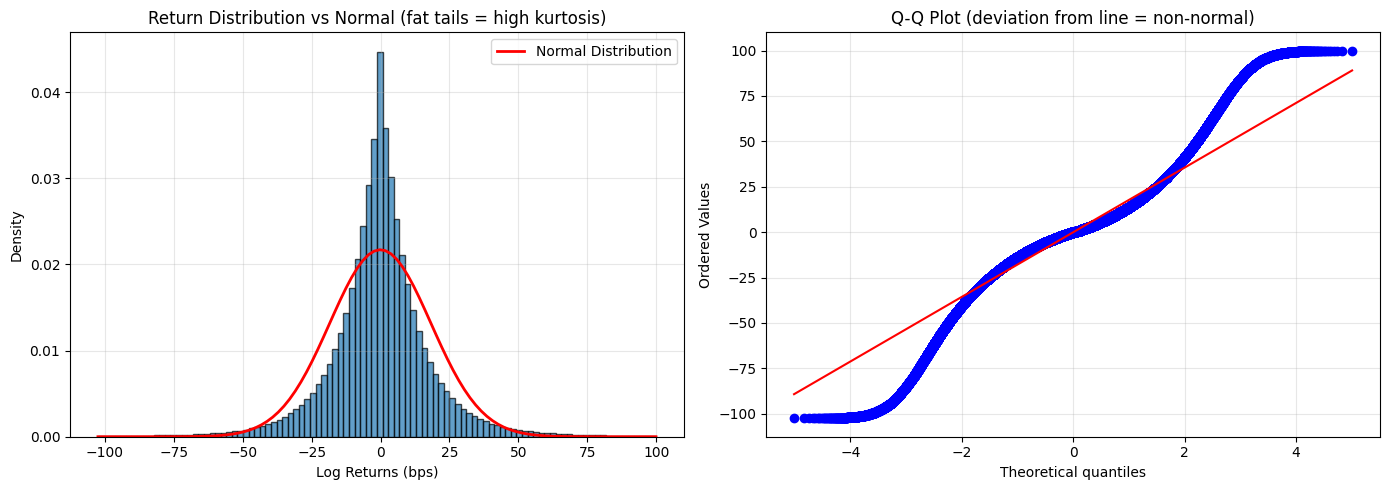

Deviation from normal distribution indicates:
- Fat tails: more extreme events than normal distribution predicts
- Typical of high-frequency financial data


In [ ]:
# Visualize return distribution
returns = panel_returns['log_return_bps'].to_numpy()

# Remove extreme outliers for visualization (keep 99.5% of data)
returns_trimmed = returns[(returns > np.percentile(returns, 0.25)) & 
                          (returns < np.percentile(returns, 99.75))]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with normal overlay
axes[0].hist(returns_trimmed, bins=100, density=True, alpha=0.7, edgecolor='black')
# Overlay normal distribution
mu, sigma = returns_trimmed.mean(), returns_trimmed.std()
x = np.linspace(returns_trimmed.min(), returns_trimmed.max(), 100)
axes[0].plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5*((x - mu)/sigma)**2), 
             'r-', linewidth=2, label='Normal Distribution')
axes[0].set_xlabel('Log Returns (bps)')
axes[0].set_ylabel('Density')
axes[0].set_title('Return Distribution vs Normal (fat tails = high kurtosis)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Q-Q plot to check normality
from scipy import stats
stats.probplot(returns_trimmed, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (deviation from line = non-normal)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Deviation from normal distribution indicates:")
print("- Fat tails: more extreme events than normal distribution predicts")
print("- Typical of high-frequency financial data")

## 7. Summary Report

Key findings from the high-frequency data analysis.

In [ ]:
print("="*70)
print("HIGH-FREQUENCY DATA ANALYSIS SUMMARY")
print("="*70)

print("\n1. CROSS-SECTIONAL HETEROGENEITY:")
print(f"   - Price range: {avg_prices.min():.2f}$ to {avg_prices.max():.2f}$")
print(f"   - Scale heterogeneity: {avg_prices.max()/avg_prices.min():.1f}x variation")
print("   - Implication: Need for normalization/standardization in models")

print("\n2. MARKET MICROSTRUCTURE:")
print(f"   - Average spread: {panel['spread'].mean():.4f}$")
print(f"   - Average relative spread: {panel_with_rel_spread['rel_spread_bps'].mean():.2f} bps")
print("   - Liquidity varies significantly across assets and industries")
print("   - Transaction costs are non-negligible at high frequency")

print("\n3. INTRADAY PATTERNS:")
print("   - U-shaped pattern in spreads (higher at open/close)")
print("   - Volume concentration during market hours")
print("   - Evidence of time-of-day effects in liquidity")

print("\n4. ORDER FLOW:")
print(f"   - Volume imbalance mean: {vol_imb.mean():.4f} (near zero = balanced)")
print("   - Symmetric distribution suggests no systematic directional pressure")

print("\n5. RETURN CHARACTERISTICS:")
print(f"   - Kurtosis: {returns_stats['kurtosis'][0]:.2f} (>3 = fat tails)")
print("   - High-frequency returns exhibit fat tails and volatility clustering")
print("   - Deviation from normality typical of HF financial data")

print("\n6. DATA QUALITY:")
print(f"   - {n_assets} assets with complete data coverage")
print(f"   - {total_obs:,} total observations at 1-minute frequency")
print("   - VWAP aggregation handles duplicate timestamps")

print("\n" + "="*70)
print("These characteristics are typical of high-frequency financial data")
print("and justify the use of specialized microstructure models.")
print("="*70)

HIGH-FREQUENCY DATA ANALYSIS SUMMARY

1. CROSS-SECTIONAL HETEROGENEITY:
   - Price range: 3.03$ to 100.21$
   - Scale heterogeneity: 33.1x variation
   - Implication: Need for normalization/standardization in models

2. MARKET MICROSTRUCTURE:
   - Average spread: 0.0611$
   - Average relative spread: 16.40 bps
   - Liquidity varies significantly across assets and industries
   - Transaction costs are non-negligible at high frequency

3. INTRADAY PATTERNS:
   - U-shaped pattern in spreads (higher at open/close)
   - Volume concentration during market hours
   - Evidence of time-of-day effects in liquidity

4. ORDER FLOW:
   - Volume imbalance mean: 0.0044 (near zero = balanced)
   - Symmetric distribution suggests no systematic directional pressure

5. RETURN CHARACTERISTICS:
   - Kurtosis: 1308.50 (>3 = fat tails)
   - High-frequency returns exhibit fat tails and volatility clustering
   - Deviation from normality typical of HF financial data

6. DATA QUALITY:
   - 78 assets with compl

# Comparison: Raw vs Processed Data

Analyze how preprocessing affected the data characteristics by comparing the same assets.

## Load Raw Data for Comparison

Load the raw data for the same assets and date range to compare preprocessing effects.

In [ ]:
from pathlib import Path

# Get list of assets in the processed panel
panel_assets = panel.select('ticker').unique().to_series().to_list()
print(f"Assets in processed panel: {len(panel_assets)}")

# Load raw data for the same assets
raw_data_path = Path('/Users/mpecaut/FBD_local_data/Data_parquet')
raw_frames = []

print("\nLoading raw data for comparison...")
for i, ticker in enumerate(panel_assets, 1):
    file_path = raw_data_path / f"{ticker}.N.parquet"
    if file_path.exists():
        df_raw = pl.read_parquet(file_path)
        
        # Convert timestamp and filter by date
        df_raw = df_raw.with_columns(
            pl.col('timestamp').str.to_datetime(format='%Y-%m-%d %H:%M:%S%.f')
        )
        
        # Filter to same date range as processed data
        df_raw = df_raw.filter(
            (pl.col('timestamp') >= pl.lit('2008-09-01').str.to_datetime()) &
            (pl.col('timestamp') <= pl.lit('2008-12-31').str.to_datetime())
        )
        
        # Add ticker
        df_raw = df_raw.with_columns(pl.lit(ticker).alias('ticker'))
        
        raw_frames.append(df_raw)
        
        if i % 10 == 0:
            print(f"  Loaded {i}/{len(panel_assets)} assets...")

# Concatenate all raw data
print("\nConcatenating raw data...")
raw_panel = pl.concat(raw_frames, how='vertical_relaxed')
print(f"Raw data shape: {raw_panel.shape}")
print(f"Processed data shape: {panel.shape}")

Assets in processed panel: 78

Loading raw data for comparison...
  Loaded 10/78 assets...
  Loaded 20/78 assets...
  Loaded 30/78 assets...
  Loaded 40/78 assets...
  Loaded 50/78 assets...
  Loaded 60/78 assets...
  Loaded 70/78 assets...

Concatenating raw data...
Raw data shape: (479123623, 7)
Processed data shape: (2536312, 10)


In [ ]:
# Calculate spreads and mid-prices for raw data
# Step 1: Create spread and mid-price
raw_panel = raw_panel.with_columns([
    (pl.col('ask-price') - pl.col('bid-price')).alias('spread'),
    ((pl.col('bid-price') + pl.col('ask-price')) / 2).alias('mid-price'),
])

# Step 2: Create relative spread and volume imbalance using the new columns
raw_panel = raw_panel.with_columns([
    (pl.col('spread') / pl.col('mid-price') * 10000).alias('rel_spread_bps'),
    ((pl.col('bid-volume') - pl.col('ask-volume')) / 
     (pl.col('bid-volume') + pl.col('ask-volume'))).alias('volume_imbalance')
])

print("Raw data statistics:")
print(f"Total observations: {raw_panel.height:,}")
print(f"Mean spread: {raw_panel['spread'].mean():.4f}")
print(f"Mean rel spread: {raw_panel['rel_spread_bps'].mean():.2f} bps")
print(f"\nProcessed data statistics:")
print(f"Total observations: {panel.height:,}")
print(f"Mean spread: {panel['spread'].mean():.4f}")
print(f"Mean rel spread: {panel_with_rel_spread['rel_spread_bps'].mean():.2f} bps")

reduction_pct = (1 - panel.height / raw_panel.height) * 100
print(f"\nData reduction: {reduction_pct:.1f}%")

Raw data statistics:
Total observations: 479,123,623
Mean spread: 0.0547
Mean rel spread: 13.75 bps

Processed data statistics:
Total observations: 2,536,312
Mean spread: 0.0611
Mean rel spread: 16.40 bps

Data reduction: 99.5%


## Comparison 1: Spread Distributions

Compare how preprocessing affected the bid-ask spread distribution.

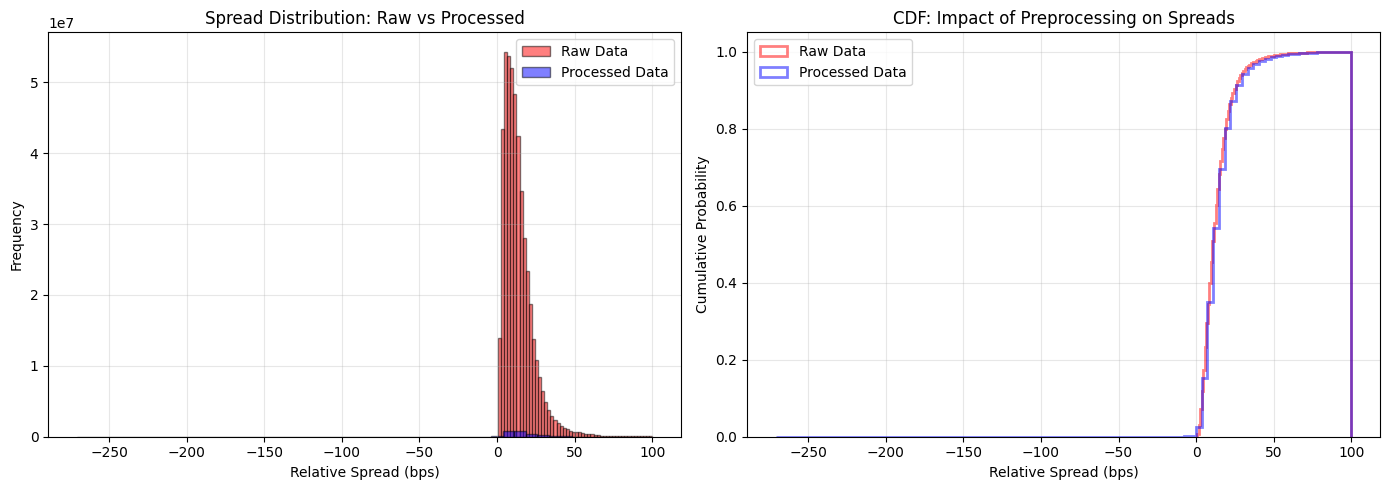

Raw data - Mean: 13.75 bps, Median: 11.39 bps
Processed data - Mean: 16.40 bps, Median: 13.85 bps


In [ ]:
# Compare spread distributions
raw_spreads = raw_panel['rel_spread_bps'].to_numpy()
proc_spreads = panel_with_rel_spread['rel_spread_bps'].to_numpy()

# Filter outliers for better visualization
raw_spreads_plot = raw_spreads[raw_spreads < 100]
proc_spreads_plot = proc_spreads[proc_spreads < 100]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram comparison
axes[0].hist(raw_spreads_plot, bins=50, alpha=0.5, label='Raw Data', edgecolor='black', color='red')
axes[0].hist(proc_spreads_plot, bins=50, alpha=0.5, label='Processed Data', edgecolor='black', color='blue')
axes[0].set_xlabel('Relative Spread (bps)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Spread Distribution: Raw vs Processed')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# CDF comparison
axes[1].hist(raw_spreads_plot, bins=100, alpha=0.5, cumulative=True, density=True, 
             label='Raw Data', color='red', histtype='step', linewidth=2)
axes[1].hist(proc_spreads_plot, bins=100, alpha=0.5, cumulative=True, density=True,
             label='Processed Data', color='blue', histtype='step', linewidth=2)
axes[1].set_xlabel('Relative Spread (bps)')
axes[1].set_ylabel('Cumulative Probability')
axes[1].set_title('CDF: Impact of Preprocessing on Spreads')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Raw data - Mean: {raw_spreads.mean():.2f} bps, Median: {np.median(raw_spreads):.2f} bps")
print(f"Processed data - Mean: {proc_spreads.mean():.2f} bps, Median: {np.median(proc_spreads):.2f} bps")

## Comparison 2: Volume Imbalance Distribution

Check if preprocessing affected the symmetry of order flow.

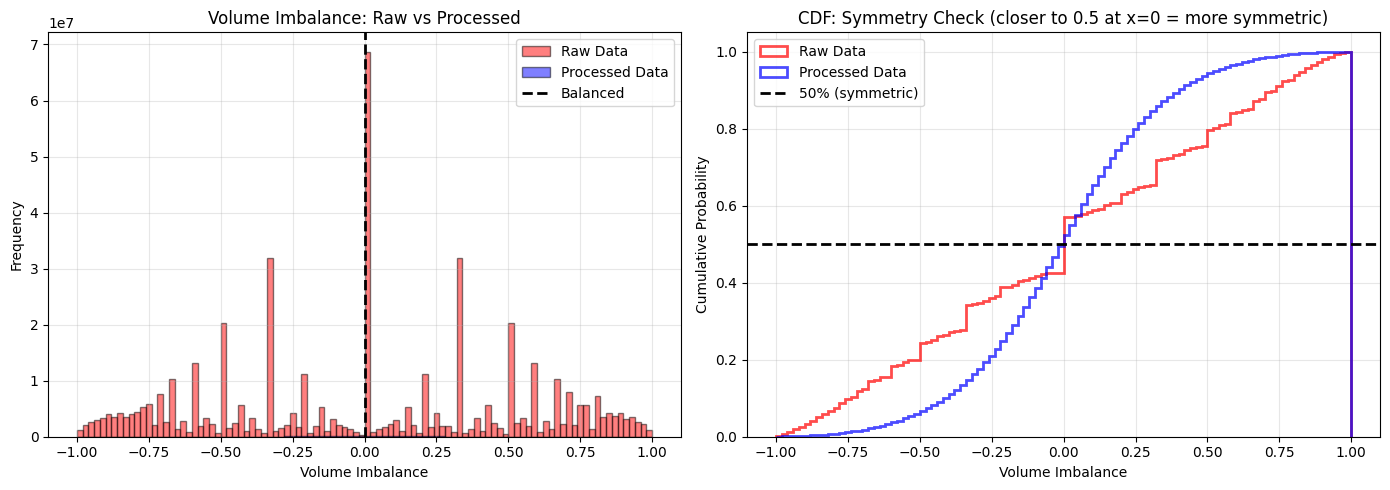

Raw data - Mean: nan, Std: nan
Processed data - Mean: 0.0044, Std: 0.3180


In [ ]:
# Compare volume imbalance distributions
raw_vol_imb = raw_panel['volume_imbalance'].to_numpy()
proc_vol_imb = panel['volume_imbalance'].to_numpy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram comparison
axes[0].hist(raw_vol_imb, bins=100, alpha=0.5, label='Raw Data', range=(-1, 1), 
             edgecolor='black', color='red')
axes[0].hist(proc_vol_imb, bins=100, alpha=0.5, label='Processed Data', range=(-1, 1),
             edgecolor='black', color='blue')
axes[0].axvline(0, color='black', linestyle='--', linewidth=2, label='Balanced')
axes[0].set_xlabel('Volume Imbalance')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Volume Imbalance: Raw vs Processed')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# CDF comparison (symmetry check)
axes[1].hist(raw_vol_imb, bins=100, cumulative=True, density=True, alpha=0.7,
             range=(-1, 1), label='Raw Data', color='red', histtype='step', linewidth=2)
axes[1].hist(proc_vol_imb, bins=100, cumulative=True, density=True, alpha=0.7,
             range=(-1, 1), label='Processed Data', color='blue', histtype='step', linewidth=2)
axes[1].axhline(0.5, color='black', linestyle='--', linewidth=2, label='50% (symmetric)')
axes[1].set_xlabel('Volume Imbalance')
axes[1].set_ylabel('Cumulative Probability')
axes[1].set_title('CDF: Symmetry Check (closer to 0.5 at x=0 = more symmetric)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Raw data - Mean: {raw_vol_imb.mean():.4f}, Std: {raw_vol_imb.std():.4f}")
print(f"Processed data - Mean: {proc_vol_imb.mean():.4f}, Std: {proc_vol_imb.std():.4f}")

## Comparison 3: Returns Distribution

Calculate and compare return distributions (raw vs processed).

In [ ]:
# Calculate returns for raw data
raw_panel_returns = raw_panel.sort(['ticker', 'timestamp']).with_columns([
    (pl.col('mid-price').log().diff().over('ticker') * 10000).alias('log_return_bps')
]).filter(pl.col('log_return_bps').is_not_null())

# Get return statistics
raw_returns = raw_panel_returns['log_return_bps'].to_numpy()
proc_returns = panel_returns['log_return_bps'].to_numpy()

# Calculate statistics
raw_stats = {
    'mean': raw_returns.mean(),
    'std': raw_returns.std(),
    'skew': pl.Series(raw_returns).skew(),
    'kurtosis': pl.Series(raw_returns).kurtosis()
}

proc_stats = {
    'mean': proc_returns.mean(),
    'std': proc_returns.std(),
    'skew': returns_stats['skewness'][0],
    'kurtosis': returns_stats['kurtosis'][0]
}

print("Return Statistics Comparison:")
print(f"\n{'Metric':<15} {'Raw Data':>15} {'Processed':>15} {'Change':>15}")
print("-" * 65)
print(f"{'Mean (bps)':<15} {raw_stats['mean']:>15.4f} {proc_stats['mean']:>15.4f} {proc_stats['mean']-raw_stats['mean']:>15.4f}")
print(f"{'Std (bps)':<15} {raw_stats['std']:>15.4f} {proc_stats['std']:>15.4f} {proc_stats['std']-raw_stats['std']:>15.4f}")
print(f"{'Skewness':<15} {raw_stats['skew']:>15.4f} {proc_stats['skew']:>15.4f} {proc_stats['skew']-raw_stats['skew']:>15.4f}")
print(f"{'Kurtosis':<15} {raw_stats['kurtosis']:>15.4f} {proc_stats['kurtosis']:>15.4f} {proc_stats['kurtosis']-raw_stats['kurtosis']:>15.4f}")

NameError: name 'raw_panel' is not defined

In [ ]:
# Visualize return distributions with Q-Q plots
raw_returns_trimmed = raw_returns[(raw_returns > np.percentile(raw_returns, 0.25)) & 
                                   (raw_returns < np.percentile(raw_returns, 99.75))]
proc_returns_trimmed = proc_returns[(proc_returns > np.percentile(proc_returns, 0.25)) & 
                                     (proc_returns < np.percentile(proc_returns, 99.75))]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram comparison
axes[0, 0].hist(raw_returns_trimmed, bins=100, density=True, alpha=0.5, 
                label='Raw Data', color='red', edgecolor='black')
axes[0, 0].hist(proc_returns_trimmed, bins=100, density=True, alpha=0.5,
                label='Processed Data', color='blue', edgecolor='black')
axes[0, 0].set_xlabel('Log Returns (bps)')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Return Distribution: Raw vs Processed')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# CDF comparison
axes[0, 1].hist(raw_returns_trimmed, bins=100, cumulative=True, density=True,
                histtype='step', linewidth=2, label='Raw Data', color='red')
axes[0, 1].hist(proc_returns_trimmed, bins=100, cumulative=True, density=True,
                histtype='step', linewidth=2, label='Processed Data', color='blue')
axes[0, 1].set_xlabel('Log Returns (bps)')
axes[0, 1].set_ylabel('Cumulative Probability')
axes[0, 1].set_title('CDF: Raw vs Processed')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot for raw data
stats.probplot(raw_returns_trimmed, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: Raw Data (deviation = fat tails)')
axes[1, 0].grid(True, alpha=0.3)

# Q-Q plot for processed data
stats.probplot(proc_returns_trimmed, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: Processed Data (deviation = fat tails)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Similar Q-Q plot shapes indicate preprocessing preserves return characteristics")
print("- Kurtosis comparison shows if preprocessing reduced/increased extreme events")
print("- Both should show fat tails (typical of HF data)")

NameError: name 'raw_returns' is not defined

## Summary: Impact of Preprocessing

Quantify how preprocessing affected the data characteristics.